In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [2]:
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav')
url

<Response [403]>

In [3]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
url=requests.get('https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav', headers=headers).text

soup=BeautifulSoup(url, 'html.parser')

soup2=BeautifulSoup(soup.prettify(), 'html.parser')


In [4]:
# companies on the first page of the website 

for i in soup2.find_all('h2'):
    print(i.text.strip())
    
company=soup.find_all('div', class_='company-info-wrapper')
len(company)

TCS
Accenture
Cognizant
ICICI Bank
HDFC Bank
Wipro
Infosys
Capgemini
Tech Mahindra
Genpact
HCLTech
Amazon
Axis Bank
IBM
Concentrix Corpo...
Reliance jio
Larsen & Toubro ...
HDB Financial Se...
Vodafone Idea
Teleperformance
Reliance Retail
Kotak Mahindra B...
Deloitte
Reliance Industr...
Bharti Airtel
Tata Motors
BYJU'S
Flipkart
WNS
Mahindra & Mahin...


30

In [5]:
# Extracting data from all the pages of the website

final_df=pd.DataFrame()

for j in range(1, 150):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTM, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    url='https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    webpage=requests.get(url, headers=headers).text
    
    soup=BeautifulSoup(webpage, 'html.parser')
    
    company=soup.find_all('div', class_='company-content-wrapper')
    
    name=[]
    rating=[]
    review=[]
    ctype=[]
    location=[]
    old_in_years=[]
    employees=[]

    for i in company:
        name.append(i.find('h2', class_='company-name').text.strip())
        rating.append(i.find('p', class_='rating').text.strip())
        review.append(i.find('a', class_='review-count').text.strip())
        try:
            ctype.append(i.find_all('p', class_='infoEntity')[0].text.strip())
        except:
            ctype.append(np.nan)
            
        try:
            location.append(i.find_all('p', class_='infoEntity')[1].text.strip())
        except:
            location.append(np.nan)
            
        try:
            old_in_years.append(i.find_all('p', class_='infoEntity')[2].text.strip())
        except:
            old_in_years.append(np.nan)
        try:
            employees.append(i.find_all('p', class_='infoEntity')[3].text.strip())
        except:
            employees.append(np.nan)
        
    d={'name': name, 'rating': rating, 'review': review, 'ctype': ctype, 'location': location, 'old_in_years':old_in_years, 'employees':employees}
    df=pd.DataFrame(d)
    
    final_df=final_df.append(df, ignore_index=True)

C:\Users\RAJAT SINGH\AppData\Local\Temp\ipykernel_1312\2769601861.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=final_df.append(df, ignore_index=True)


In [6]:
final_df.head()

,name,rating,review,ctype,location,old_in_years,employees
0,TCS,3.9,(50.7k Reviews),Public,"Mumbai,Maharashtra + 270 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.4k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,4.0,(29.8k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(33.7k Reviews),Public,"Mumbai,Maharashtra + 1057 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(39.5k Reviews),Public,"Mumbai,Maharashtra + 1254 more",29 years old,50k-1 Lakh Employees (India)


In [7]:
final_df.shape

(4469, 7)

### Data Mining

In [8]:
final_df.isnull().mean()*100

name            0.000000
rating          0.000000
review          0.000000
ctype           0.000000
location        1.051689
old_in_years    3.110316
employees       9.599463
dtype: float64

In [9]:
# we have to drop the null values as some values have jumbled up in the middle part of the dataset which has left most of the null values in the 'employees' section, i have tried correcting it multiple times but everytime i run the program as fresh , the null values changes, therefore i have left with no option. 
final_df.dropna(inplace=True)

In [10]:
final_df.isnull().mean()*100

name            0.0
rating          0.0
review          0.0
ctype           0.0
location        0.0
old_in_years    0.0
employees       0.0
dtype: float64

In [11]:
final_df.shape

(4040, 7)

In [12]:
final_df.head()

,name,rating,review,ctype,location,old_in_years,employees
0,TCS,3.9,(50.7k Reviews),Public,"Mumbai,Maharashtra + 270 more",55 years old,1 Lakh+ Employees (India)
1,Accenture,4.1,(32.4k Reviews),Public,Dublin + 131 more,34 years old,1 Lakh+ Employees (India)
2,Cognizant,4.0,(29.8k Reviews),Private,Teaneck. New Jersey. + 101 more,29 years old,1 Lakh+ Employees (India)
3,ICICI Bank,4.0,(33.7k Reviews),Public,"Mumbai,Maharashtra + 1057 more",29 years old,1 Lakh+ Employees (India)
4,HDFC Bank,4.0,(39.5k Reviews),Public,"Mumbai,Maharashtra + 1254 more",29 years old,50k-1 Lakh Employees (India)


In [13]:
def review(x):
    return x.split(' ')[0].split('(')[1]

final_df['review']=final_df['review'].apply(review)

In [14]:
def year(x):
    return x.split(' ')[0]

final_df['total_no_of_years']=final_df['old_in_years'].apply(year)

In [15]:
def hq(x):
    return x.split('+')[0]

final_df['Hq']=final_df['location'].apply(hq)

final_df.drop('old_in_years', axis=1, inplace=True)

In [16]:
final_df.head()

,name,rating,review,ctype,location,employees,total_no_of_years,Hq
0,TCS,3.9,50.7k,Public,"Mumbai,Maharashtra + 270 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra"
1,Accenture,4.1,32.4k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,Dublin
2,Cognizant,4.0,29.8k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,Teaneck. New Jersey.
3,ICICI Bank,4.0,33.7k,Public,"Mumbai,Maharashtra + 1057 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra"
4,HDFC Bank,4.0,39.5k,Public,"Mumbai,Maharashtra + 1254 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra"


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4468
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4040 non-null   object
 1   rating             4040 non-null   object
 2   review             4040 non-null   object
 3   ctype              4040 non-null   object
 4   location           4040 non-null   object
 5   employees          4040 non-null   object
 6   total_no_of_years  4040 non-null   object
 7   Hq                 4040 non-null   object
dtypes: object(8)
memory usage: 284.1+ KB


In [18]:
final_df['rating']=final_df['rating'].astype('float')
final_df['total_no_of_years']=final_df['total_no_of_years'].astype('int')

In [19]:
final_df.rename(columns={'name':'Company_name', 'review':'Reviews','rating':'Rating', 'ctype':'Company_type','location':'Total_Locations', 'employees':'Employees','total_no_of_years':'Total_no_of_years'}, inplace=True)

In [20]:
final_df.head()

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
0,TCS,3.9,50.7k,Public,"Mumbai,Maharashtra + 270 more",1 Lakh+ Employees (India),55,"Mumbai,Maharashtra"
1,Accenture,4.1,32.4k,Public,Dublin + 131 more,1 Lakh+ Employees (India),34,Dublin
2,Cognizant,4.0,29.8k,Private,Teaneck. New Jersey. + 101 more,1 Lakh+ Employees (India),29,Teaneck. New Jersey.
3,ICICI Bank,4.0,33.7k,Public,"Mumbai,Maharashtra + 1057 more",1 Lakh+ Employees (India),29,"Mumbai,Maharashtra"
4,HDFC Bank,4.0,39.5k,Public,"Mumbai,Maharashtra + 1254 more",50k-1 Lakh Employees (India),29,"Mumbai,Maharashtra"


In [26]:
final_df['Hq'].value_counts()[0:20]

Mumbai,Maharashtra                   562
Bangalore/Bengaluru,Karnataka        179
Chennai,Tamil Nadu                   178
Gurgaon/Gurugram,Haryana             171
Hyderabad/Secunderabad,Telangana     147
Delhi/NCR,Delhi                      131
Noida,Uttar Pradesh                  129
Mumbai                               117
Pune,Maharashtra                     105
Kolkata,West Bengal                  102
Delhi/NCR,New Delhi                   85
Bangalore,Karnataka                   83
Gurgaon,Haryana                       50
Ahmedabad,Gujarat                     48
New Delhi                             46
London                                44
Pune                                  35
Gurgaon                               33
Noida                                 29
Hyderabad                             28
Name: Hq, dtype: int64

In [33]:
# since we can see some of the places are same but are differently spelt, so we have to correct the spelling to perform proper data visualizations

final_df.replace('Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Bengaluru/Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bengaluru ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore/Bengaluru,Karnataka ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Bangalore ', 'Bengaluru,Karnataka ',inplace=True)
final_df.replace('Bengaluru/Bangalore ', 'Bengaluru,Karnataka ', inplace=True)
final_df.replace('Noida ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Greater Noida,Uttar Pradesh ', 'Noida,Uttar Pradesh ', inplace=True)
final_df.replace('Navi Mumbai,Maharashtra ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Navi Mumbai ', 'Mumbai,Maharashtra ', inplace=True)
final_df.replace('Nashik ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Nasik/Nashik,Maharashtra ', 'Nashik,Maharashtra ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('GURGAON ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgram ', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram,Haryana', 'Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Gurgaon/Gurugram ','Gurgaon,Haryana ', inplace=True)
final_df.replace('Faridabad ','Faridabad,Haryana ', inplace=True)
final_df.replace('Ahmedabad,Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahemdabad ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Ahmedabad,\xa0India ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('Gujrat ', 'Ahmedabad,Gujarat ',inplace=True)
final_df.replace('New York,New York ','New York City,New York ', inplace=True)
final_df.replace('New York,New York, ','New York City,New York ', inplace=True)
final_df.replace('New York ','New York City,New York ', inplace=True)
final_df.replace('New York','New York City,New York ', inplace=True)
final_df.replace('New York,NY ','New York City,New York ', inplace=True)
final_df.replace('Purchase,New York ','New York City,New York ', inplace=True)
final_df.replace('Chennai ', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Chennai,Tamil Nadu', 'Chennai,Tamil Nadu ', inplace=True)
final_df.replace('Paris ', 'Paris,France ', inplace=True)
final_df.replace('Paris,Ile de France ', 'Paris,France ', inplace=True)
final_df.replace('Paris,√éle-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Paris,Ile-de-France ', 'Paris,France ', inplace=True)
final_df.replace('Delhi,NCT ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi/NCR,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('New Delhi,New Delhi ', 'Delhi/NCR,Delhi ', inplace=True)
final_df.replace('Pune ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Lonavla ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Pune,Indore ', 'Pune,Maharashtra ', inplace=True)
final_df.replace('Osaka ', 'Osaka,Japan ', inplace=True)
final_df.replace('Geneva,Geneva ', 'Geneva,Switzerland ', inplace=True)
final_df.replace('Abu Dhabi,Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Al Ain,Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Abu Dhabi ', 'Abu Dhabi,UAE ', inplace=True)
final_df.replace('Kolkata ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,India ', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Kolkata,West Bengal', 'West Bengal,Kolkata ', inplace=True)
final_df.replace('Hyderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Hyderabad/Secunderabad ', 'Hyderabad,Telangana ', inplace=True)
final_df.replace('Tokyo,Tokyo-to ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo,Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Toyota City,Aichi Prefecture ', 'Tokyo,Japan ', inplace=True)
final_df.replace('London,London ', 'London,England ', inplace=True)
final_df.replace('London ', 'London,England ', inplace=True)
final_df.replace('Dubai,Dubai ', 'Dubai ,UAE ', inplace=True)
final_df.replace('Dubai ', 'Dubai ,UAE ', inplace=True)
final_df.replace('Ota City,Tokyo ', 'Tokyo,Japan ', inplace=True)
final_df.replace('Jodhpur ', 'Jodhpur, Rajasthan ', inplace=True)

final_df['Hq'].value_counts()[0:20]

Mumbai,Maharashtra                   701
Delhi/NCR,Delhi                      313
Bengaluru,Karnataka                  312
Gurgaon,Haryana                      273
Chennai,Tamil Nadu                   208
Noida,Uttar Pradesh                  164
Hyderabad/Secunderabad,Telangana     147
Pune,Maharashtra                     143
Kolkata,West Bengal                  102
Ahmedabad,Gujarat                     86
New York City,New York                52
London,England                        49
Hyderabad,Telangana                   35
Faridabad,Haryana                     26
Dubai ,UAE                            24
Paris,France                          24
Jaipur,Rajasthan                      22
Tokyo,Japan                           20
San Jose,California                   19
West Bengal,Kolkata                   18
Name: Hq, dtype: int64

### To find Outliers

In [72]:
final_df['Total_no_of_years'].unique()

array([ 55,  34,  29,  78,  42,  56,  37,  26,  32,  30, 112,  40,  16,
        77,   5,  45,  17,  20, 178,  50,  28,  12,  27,   6,  23,  21,
       147,  25,  88,  19,   7,  81,  35,  24, 128,  36,  11,  13,  90,
        48,  22, 171,  71,  44, 158,  75,  14, 176,   8, 116,  33,  41,
        46,  10,  39, 137,  79,  43,  74,  85, 117, 126, 122, 120,  84,
       136,  63,  65,  15,   9,  38,  69,  31,  64,  91,  47, 173, 153,
        99,  93,  92,  68,  54, 119,  52,  80,  87,  18, 100, 139,  51,
        49, 114,  67,  76, 159,  59, 131,  98, 231,  57,  82,  96,  86,
         3,  61,  94,  73, 177, 103,  66,  72,  53, 333,  62, 358, 195,
        83,  89, 106, 145, 211, 186, 113, 115,  97,  70, 105, 104, 134,
        95, 160, 170, 175,  58,  60, 111, 167, 152, 157, 124,   4, 142,
       135, 101, 129, 141, 161, 164, 125, 166, 221, 150, 107, 163, 108,
       133, 127, 144, 121, 185, 169, 265,   1, 154, 102, 208, 189, 203,
       184, 123, 190, 235, 156, 182, 132, 199, 138, 206, 140, 17

In [53]:
# replacing the values with the correct ones 

final_df.loc[final_df['Total_no_of_years']==2023]


final_df.loc[[1162, 1274],['Total_no_of_years']]=[23, 46]


,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
1162,Prodapt Solution...,3.9,429,Private,"Chennai,Tamil Nadu + 7 more",1k-5k Employees (India),2023,"Chennai,Tamil Nadu"
1274,TDK India,4.0,393,Private,Nashik + 19 more,1k-5k Employees (India),2023,"Nashik,Maharashtra"


In [58]:
final_df.loc[final_df['Total_no_of_years']==355]

final_df.loc[[3305],['Total_no_of_years']]=[36]

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
3305,Merck Life Scien...,4.2,161,Private,Mumbai + 12 more,1k-5k Employees (India),355,"Mumbai,Maharashtra"


In [60]:
final_df.loc[final_df['Total_no_of_years']==325]

final_df.loc[[2840, 2937],['Total_no_of_years']]=[221, 221]

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
2840,Refinitiv,4.1,184,Private,"London,England + 1 more",51-200 Employees (India),325,"London,England"
2937,London Stock Exc...,4.2,361,Private,London + 3 more,5k-10k Employees (India),325,"London,England"


In [62]:
final_df.loc[final_df['Total_no_of_years']==327]

final_df.loc[[910],['Total_no_of_years']]=[20]

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
910,Aviva Life Insur...,4.1,540,JV,London + 83 more,1k-5k Employees (India),327,"London,England"


In [76]:
final_df.loc[final_df['Total_no_of_years']==190]

,Company_name,Rating,Reviews,Company_type,Total_Locations,Employees,Total_no_of_years,Hq
1944,Lafarge,4.1,261,Private,Paris + 68 more,201-500 Employees (India),190,"Paris,France"


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


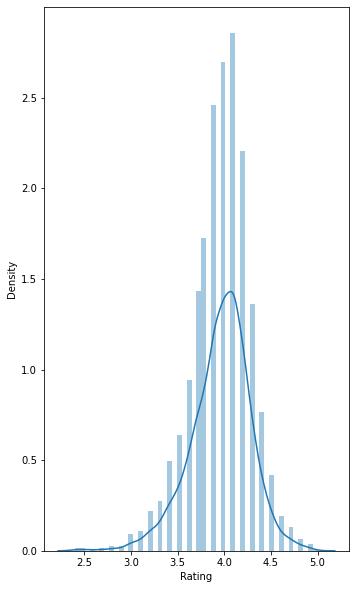

count    4040.000000
mean        3.960668
std         0.322108
min         2.400000
25%         3.800000
50%         4.000000
75%         4.200000
max         5.000000
Name: Rating, dtype: float64

In [35]:
# since the data is a little left skewed, but this can be ignored as the all the values lies within the range .

plt.figure(figsize=(12,10))
plt.subplot(121)
sns.distplot(final_df['Rating'])
plt.show()


final_df['Rating'].describe()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


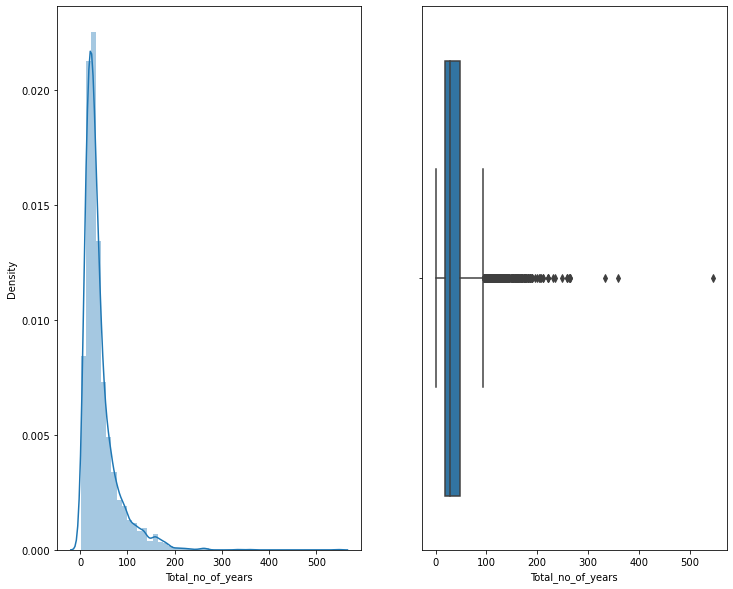

count    4040.000000
mean       40.967327
std        36.307269
min         1.000000
25%        19.000000
50%        29.000000
75%        49.000000
max       545.000000
Name: Total_no_of_years, dtype: float64

In [73]:
# it is a right skewed graph, but dealing with the outliers can impact the data too much, as most of the 'Total_no_of_years' are correct. I won't be applying any type of method to deal with the outliers. 

plt.figure(figsize=(12,10))
plt.subplot(121)
sns.distplot(final_df['Total_no_of_years'])

plt.subplot(122)
sns.boxplot(final_df['Total_no_of_years'])
plt.show()

final_df['Total_no_of_years'].describe()

###  converting the dataset into csv file 

In [77]:
ambition_web_scraping_project2=pd.DataFrame(final_df, columns=['Company_name', 'Rating', 'Reviews', 'Company_type', 'Total_Locations', 'Employees','Total_no_of_years','Hq'])
final_df.to_csv('C://Users//RAJAT SINGH//Downloads//Ambition web scraping project//ambition_web_scraping_project2.csv')

## Data Visualization

### Find Cities with highest number of Hq?

In [79]:
total_hq = final_df['Hq'].value_counts()[0:20]
total_hq

Mumbai,Maharashtra                   701
Delhi/NCR,Delhi                      313
Bengaluru,Karnataka                  312
Gurgaon,Haryana                      273
Chennai,Tamil Nadu                   208
Noida,Uttar Pradesh                  164
Hyderabad/Secunderabad,Telangana     147
Pune,Maharashtra                     143
Kolkata,West Bengal                  102
Ahmedabad,Gujarat                     86
New York City,New York                52
London,England                        49
Hyderabad,Telangana                   35
Faridabad,Haryana                     26
Dubai ,UAE                            24
Paris,France                          24
Jaipur,Rajasthan                      22
Tokyo,Japan                           20
San Jose,California                   19
West Bengal,Kolkata                   18
Name: Hq, dtype: int64

In [80]:
total_hq.index

Index(['Mumbai,Maharashtra ', 'Delhi/NCR,Delhi ', 'Bengaluru,Karnataka ',
       'Gurgaon,Haryana ', 'Chennai,Tamil Nadu ', 'Noida,Uttar Pradesh ',
       'Hyderabad/Secunderabad,Telangana ', 'Pune,Maharashtra ',
       'Kolkata,West Bengal ', 'Ahmedabad,Gujarat ', 'New York City,New York ',
       'London,England ', 'Hyderabad,Telangana ', 'Faridabad,Haryana ',
       'Dubai ,UAE ', 'Paris,France ', 'Jaipur,Rajasthan ', 'Tokyo,Japan ',
       'San Jose,California ', 'West Bengal,Kolkata '],
      dtype='object')

Text(0.5, 0, 'Hq')

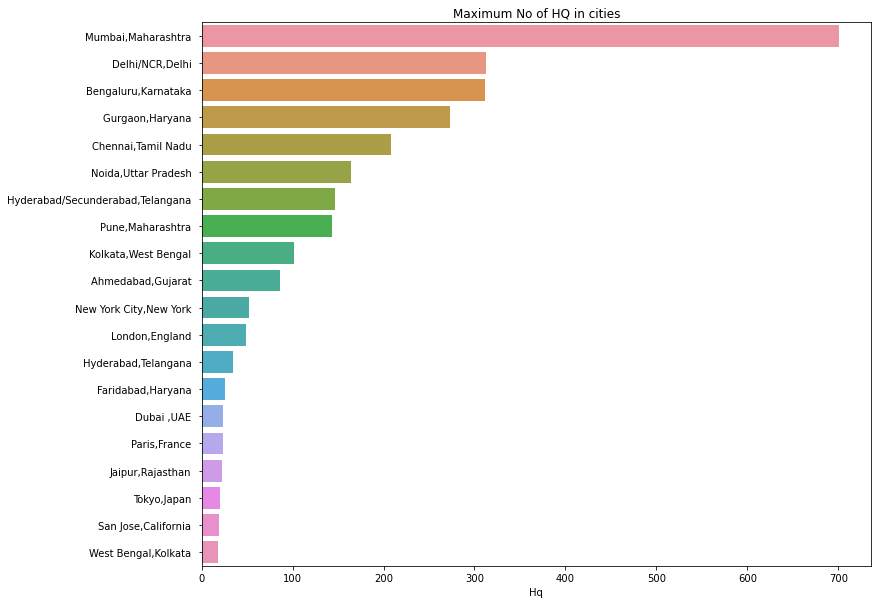

In [81]:
plt.figure(figsize=(12, 10))
sns.barplot(x=total_hq, y=total_hq.index )
plt.title('Maximum No of HQ in cities')
plt.xlabel('Hq')

### What are the total Company_types?

In [83]:
total_type = final_df['Company_type'].value_counts()
total_type

Private                                     2806
Public                                      1140
JV                                            25
Government                                    13
LLP                                           13
Partnership                                   11
LLC                                           10
NGO/NPO                                        9
Govt Organisation                              6
Other                                          3
Central Public Sector Enterprises (CPSE)       1
Conglomerate                                   1
Sole Proprietorship                            1
Proprietorship                                 1
Name: Company_type, dtype: int64

In [84]:
total_type.index

Index(['Private', 'Public', 'JV', 'Government', 'LLP', 'Partnership', 'LLC',
       'NGO/NPO', 'Govt Organisation', 'Other',
       'Central Public Sector Enterprises (CPSE)', 'Conglomerate',
       'Sole Proprietorship', 'Proprietorship'],
      dtype='object')

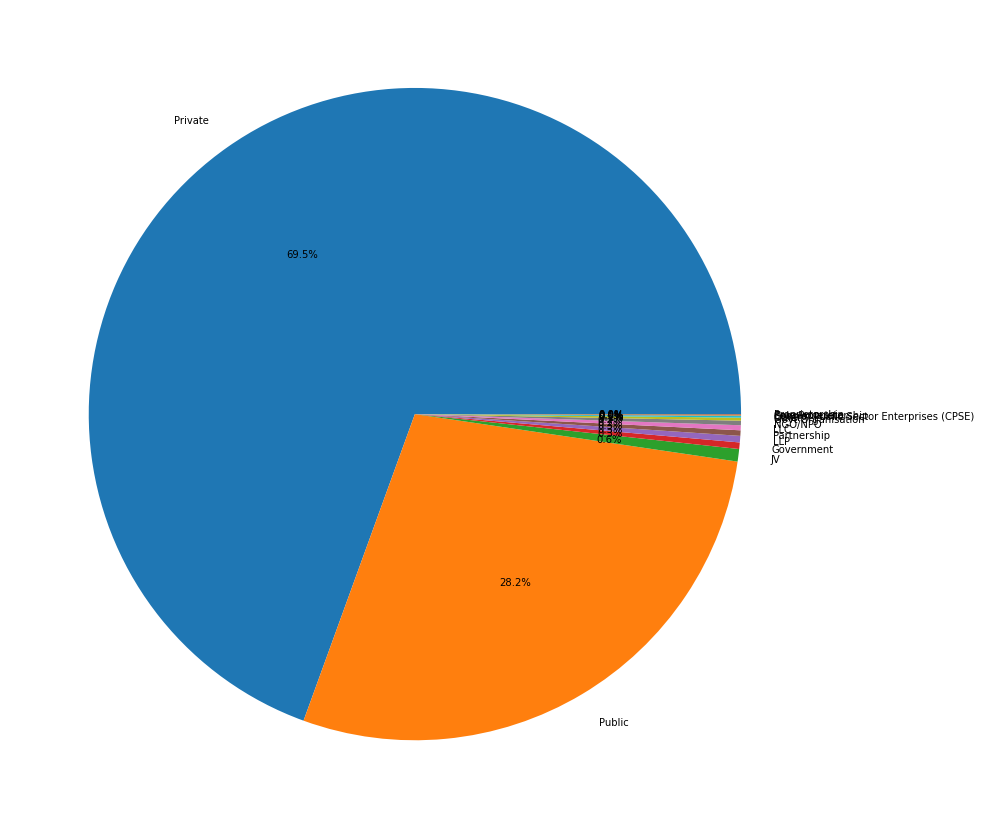

In [93]:
plt.figure(figsize=(15,15))
plt.pie(total_type, labels=total_type.index, autopct='%0.1f%%')
plt.show()

### Top Rated Companies 

In [97]:
final_df['Rating'].value_counts()

4.1    600
4.0    567
3.9    517
4.2    463
3.8    362
3.7    301
4.3    286
3.6    198
4.4    161
3.5    134
3.4    104
4.5     88
3.3     58
3.2     46
4.6     40
4.7     28
3.1     23
3.0     19
4.8     14
4.9      8
2.9      6
2.8      5
2.5      3
2.4      3
2.7      3
2.6      2
5.0      1
Name: Rating, dtype: int64

In [108]:
top_companies=final_df.groupby('Company_name')['Rating'].max().nlargest(20)
top_companies

Company_name
Hummingwave Tech...    5.0
Aurigo                 4.9
Claritus Managem...    4.9
E2logy Software ...    4.9
Hire Glocal            4.9
Online Legal Ind...    4.9
Sistema Shyam Te...    4.9
Zovian Technolog...    4.9
75way Technologi...    4.8
AYN InfoTech           4.8
Appsierra              4.8
CodeClouds             4.8
ExportersIndia         4.8
Fingent                4.8
Kalyan Jewellers       4.8
Mayoor School          4.8
Namdev Finvest         4.8
NetTantra Techno...    4.8
Skilliantech           4.8
Taj Mahal Hotel        4.8
Name: Rating, dtype: float64

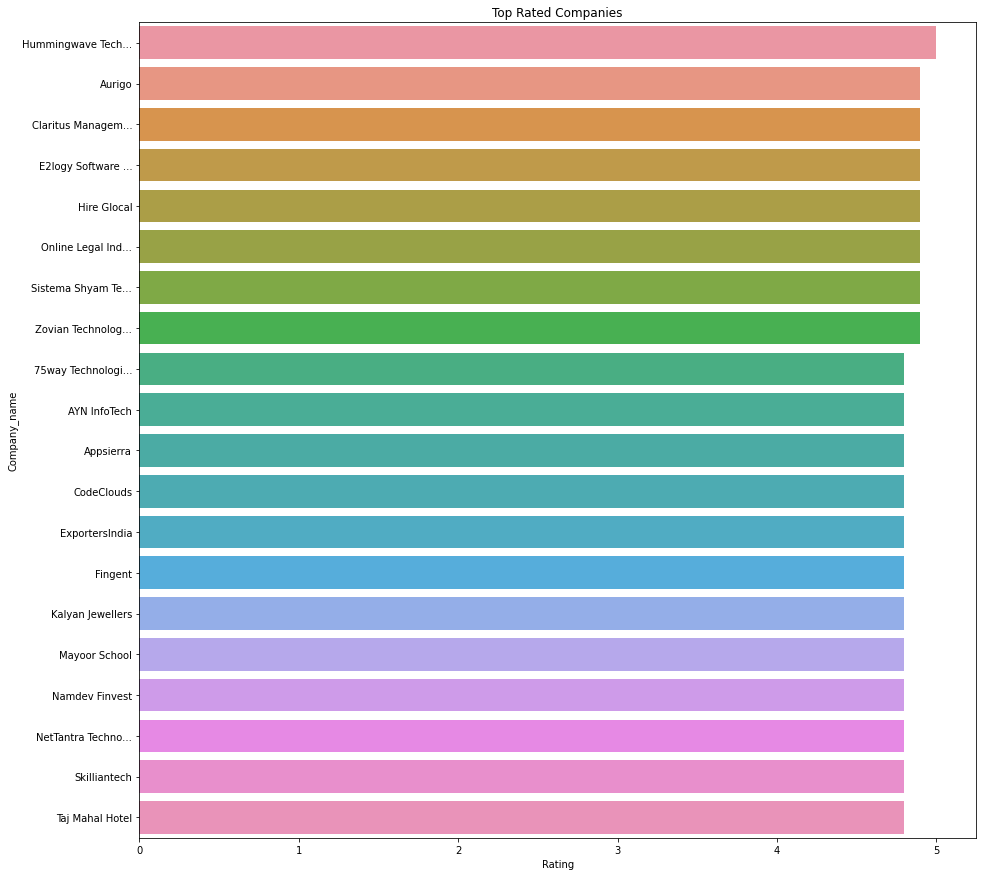

In [109]:
plt.figure(figsize=(15,15))
sns.barplot(x=top_companies, y=top_companies.index)
plt.title('Top Rated Companies')
plt.show()

### Least Rated companies

In [107]:
least_companies=final_df.groupby('Company_name')['Rating'].min().nsmallest(20)
least_companies

Company_name
DSM Infocom            2.4
Franchise India ...    2.4
Royal Research         2.4
Mobiloitte Techn...    2.5
Richfeel Health ...    2.5
SiliconIndia           2.5
INDIABULLS PHARM...    2.6
MagicPin               2.6
Galore Networks        2.7
Trigo Quality Pr...    2.7
Vcare Call Cente...    2.7
Alankit                2.8
IndianMoney.com        2.8
MAQ Software           2.8
OMICS Internatio...    2.8
Xrbia Developers       2.8
Entab Infotech         2.9
Jaro Education         2.9
Maxi Multiservic...    2.9
Precision Camsha...    2.9
Name: Rating, dtype: float64

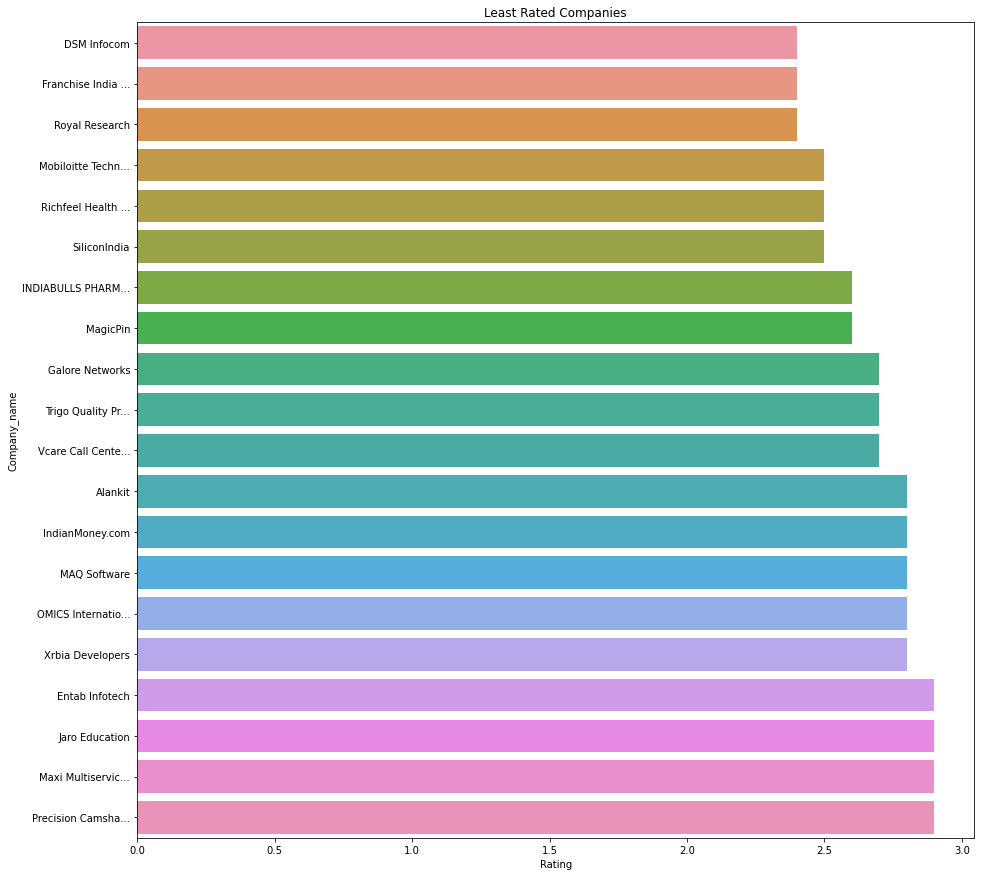

In [111]:
plt.figure(figsize=(15,15))
sns.barplot(x=least_companies, y=least_companies.index)
plt.title('Least Rated Companies')
plt.show()